In [28]:
import pandas as pd

In [29]:
import matplotlib.pyplot as plt

In [30]:
import seaborn as sns

In [31]:
df=pd.read_csv("C:\\Users\\saran\\Downloads\\seattle-weather.csv")

In [32]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<Axes: xlabel='precipitation', ylabel='Count'>

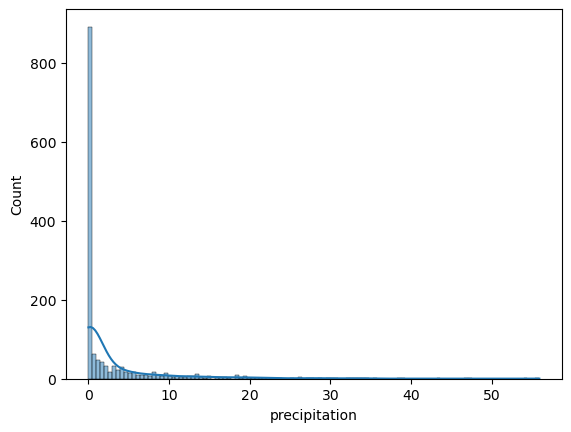

In [33]:
sns.histplot(df['precipitation'], kde=True)

In [34]:
df['precipitation'].describe()


count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [35]:
for col in ['temp_max','temp_min','wind']:
    df[f'{col}_d'] = pd.qcut(df[col], q=4, labels=['low', 'medium', 'high', 'veryhigh'])


In [36]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_d,temp_min_d,wind_d
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,medium,medium,veryhigh
1,2012-01-02,10.9,10.6,2.8,4.5,rain,low,low,veryhigh
2,2012-01-03,0.8,11.7,7.2,2.3,rain,medium,medium,medium
3,2012-01-04,20.3,12.2,5.6,4.7,rain,medium,medium,veryhigh
4,2012-01-05,1.3,8.9,2.8,6.1,rain,low,low,veryhigh


In [37]:
df.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [38]:
def precipitation_discretizer(value):
    if value<=2.80:
        return 'low'
    elif value>2.80 and value<=6.80:
        return 'medium'
    else:
        return 'high'

In [39]:
df['precipitation_d']=df['precipitation'].apply(precipitation_discretizer)

In [40]:
X=df[['weather','temp_max_d',	'temp_min_d',	'wind_d',	'precipitation_d']]

In [41]:
X.head()

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d
0,drizzle,medium,medium,veryhigh,low
1,rain,low,low,veryhigh,high
2,rain,medium,medium,medium,low
3,rain,medium,medium,veryhigh,high
4,rain,low,low,veryhigh,low


In [42]:
X['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [43]:
X.dtypes

weather              object
temp_max_d         category
temp_min_d         category
wind_d             category
precipitation_d      object
dtype: object

In [44]:
X = X.astype(str)

In [45]:
X.dtypes

weather            object
temp_max_d         object
temp_min_d         object
wind_d             object
precipitation_d    object
dtype: object

In [46]:
X['concat_col']=X['weather']+'_'+ X['precipitation_d']+'_'+ X['wind_d']+'_'+ X['temp_max_d']+ '_'+ X['temp_min_d']  

In [47]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col
0,drizzle,medium,medium,veryhigh,low,drizzle_low_veryhigh_medium_medium
1,rain,low,low,veryhigh,high,rain_high_veryhigh_low_low
2,rain,medium,medium,medium,low,rain_low_medium_medium_medium
3,rain,medium,medium,veryhigh,high,rain_high_veryhigh_medium_medium
4,rain,low,low,veryhigh,low,rain_low_veryhigh_low_low
...,...,...,...,...,...,...
1456,rain,low,low,medium,high,rain_high_medium_low_low
1457,rain,low,low,low,low,rain_low_low_low_low
1458,fog,low,low,medium,low,fog_low_medium_low_low
1459,sun,low,low,high,low,sun_low_high_low_low


In [48]:
!pip install hmmlearn

In [49]:
from hmmlearn.hmm import CategoricalHMM

In [50]:
model = CategoricalHMM(n_components=3)

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()

In [55]:
le.fit(X['concat_col'].to_list())

LabelEncoder()

In [56]:
le.transform(['drizzle_low_veryhigh_medium_medium'])

array([19])

In [58]:
def label_encoder_output(element):
    return le.transform([element])[0]

In [61]:
label_encoder_output('drizzle_low_veryhigh_medium_medium')

np.int64(19)

In [59]:
X['concat_col_label_encoded']=X['concat_col'].apply(label_encoder_output)

In [60]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col,concat_col_label_encoded
0,drizzle,medium,medium,veryhigh,low,drizzle_low_veryhigh_medium_medium,19
1,rain,low,low,veryhigh,high,rain_high_veryhigh_low_low,76
2,rain,medium,medium,medium,low,rain_low_medium_medium_medium,106
3,rain,medium,medium,veryhigh,high,rain_high_veryhigh_medium_medium,80
4,rain,low,low,veryhigh,low,rain_low_veryhigh_low_low,114
...,...,...,...,...,...,...,...
1456,rain,low,low,medium,high,rain_high_medium_low_low,68
1457,rain,low,low,low,low,rain_low_low_low_low,93
1458,fog,low,low,medium,low,fog_low_medium_low_low,41
1459,sun,low,low,high,low,sun_low_high_low_low,169


In [64]:
sequence_of_labels=X['concat_col_label_encoded'].to_list()

# HOME WORK 1 UNDERSTAND HMM , fit, decode, high level overview of the algorithms, you will come across algos like viterbi, balm welch, research these say from youtube, wiki, or any other source 

In [67]:
model.fit([sequence_of_labels])

CategoricalHMM(n_components=3, n_features=np.int64(214),
               random_state=RandomState(MT19937) at 0x1D238F94E40)

In [68]:
model.decode([sequence_of_labels])

(-6959.146031324471, array([1, 2, 0, ..., 0, 1, 2]))

In [69]:
model.decode([sequence_of_labels])[1][:20]

array([1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1])

In [70]:
X['hidden_state']=model.decode([sequence_of_labels])[1]

In [71]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col,concat_col_label_encoded,hidden_state
0,drizzle,medium,medium,veryhigh,low,drizzle_low_veryhigh_medium_medium,19,1
1,rain,low,low,veryhigh,high,rain_high_veryhigh_low_low,76,2
2,rain,medium,medium,medium,low,rain_low_medium_medium_medium,106,0
3,rain,medium,medium,veryhigh,high,rain_high_veryhigh_medium_medium,80,1
4,rain,low,low,veryhigh,low,rain_low_veryhigh_low_low,114,2
...,...,...,...,...,...,...,...,...
1456,rain,low,low,medium,high,rain_high_medium_low_low,68,1
1457,rain,low,low,low,low,rain_low_low_low_low,93,2
1458,fog,low,low,medium,low,fog_low_medium_low_low,41,0
1459,sun,low,low,high,low,sun_low_high_low_low,169,1


# HOME WORK 2: INTERPRET THESE HIDDEN STATES (CLASS PROJECT 1)
- use distributions ,plots , any analytics you can think of make sense of these latent hidden states
- i.e. making sense of the model.
- -play with number of hidden states until the model is meaningful

In [72]:
model.transmat_

array([[3.30951031e-05, 8.92836760e-01, 1.07130145e-01],
       [5.82368142e-01, 1.36300565e-03, 4.16268852e-01],
       [8.96292181e-01, 1.03610847e-01, 9.69725677e-05]])

In [ ]:
#

In [73]:
model.emissionprob_

array([[2.29087859e-11, 8.70477350e-06, 2.12789267e-05, 5.02432769e-03,
        1.78733766e-05, 3.05079429e-03, 8.06186623e-03, 1.63561194e-03,
        3.35271333e-03, 8.38110219e-03, 1.70398519e-09, 1.67635692e-03,
        1.25695489e-06, 1.49133779e-12, 2.97773044e-13, 2.89058901e-29,
        2.61580740e-09, 3.35270442e-03, 1.42983397e-23, 1.41824084e-41,
        2.78715121e-09, 3.00581794e-06, 3.42596163e-03, 1.14428398e-03,
        2.12674646e-17, 2.71303500e-06, 5.62327297e-03, 1.70057883e-03,
        4.66395263e-03, 5.15235163e-03, 4.67164110e-03, 1.39184530e-07,
        1.87093692e-15, 4.11358117e-03, 9.36188181e-10, 6.09749883e-03,
        2.12669396e-03, 1.13658411e-06, 3.59141682e-13, 1.70603861e-03,
        1.40304006e-05, 8.26030548e-03, 3.86552298e-03, 1.96237270e-29,
        4.56672746e-13, 1.17835285e-03, 6.63925582e-03, 1.67635690e-03,
        4.71557302e-14, 5.77721714e-09, 4.58112401e-08, 2.55713826e-06,
        9.58494554e-03, 9.35621081e-09, 2.09699965e-10, 3.818067

# HOME WORK 3: Model Optimization
- learn aic , bic evalution metrics
-iterate modelling to optimize for evaluation metrics